In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[0]))

Total records (rows) in the Transaction Dataset : 19803
Total features (columns) in the Transaction Dataset : 19803


In [5]:
cust.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46
4,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,Missing,Retail,High Net Worth,N,Yes,13.0,57


In [6]:
print("Total records (rows) in the Customer Demographics Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cust.shape[0]))

Total records (rows) in the Customer Demographics Dataset : 3791
Total features (columns) in the Customer Demographics Dataset : 3791


In [7]:
# Merging both the Transaction Dataset and Customer Demographics Dataset based on customer_id.

merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [8]:
merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45


In [9]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_trans_cust.shape[1]))


Total records (rows) in the Merged Dataset : 18732
Total features (columns) in the Merged Dataset : 26


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18732 entries, 0 to 18731
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       18732 non-null  int64  
 1   product_id                           18732 non-null  int64  
 2   customer_id                          18732 non-null  int64  
 3   transaction_date                     18732 non-null  object 
 4   online_order                         18732 non-null  float64
 5   order_status                         18732 non-null  object 
 6   brand                                18732 non-null  object 
 7   product_line                         18732 non-null  object 
 8   product_class                        18732 non-null  object 
 9   product_size                         18732 non-null  object 
 10  list_price                           18732 non-null  float64
 11  standard_cost               

In [11]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])

# 1: RFM Analysis

RFM Analysis stands for Recency, Frequency and Monetary Value Analysis. It is a behaviour-based approach of grouping customers into segments.


Recency (R): Who have purchased recently? Number of days since last purchase (least recency)

Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)

Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)


In [12]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [13]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
# Creating a RFM table that will contain all the values for recency , frequency and monetary data. 

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})


In [15]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [16]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [17]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [18]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
5,16,6,2394.94,4,2,2
6,64,5,3946.55,2,2,3
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [19]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [20]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [21]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
6,64,5,3946.55,2,2,3,223,Silver
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


# Merging both RFM Table with Transaction and Customer Tables

In [22]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [23]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18732 entries, 0 to 18731
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18732 non-null  int64         
 1   product_id                           18732 non-null  int64         
 2   customer_id                          18732 non-null  int64         
 3   transaction_date                     18732 non-null  datetime64[ns]
 4   online_order                         18732 non-null  float64       
 5   order_status                         18732 non-null  object        
 6   brand                                18732 non-null  object        
 7   product_line                         18732 non-null  object        
 8   product_class                        18732 non-null  object        
 9   product_size                         18732 non-null  object        
 10  list_price

# Creating an Age Group feature

In [24]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

# Creating a Detail Customer title / tag based on RFM Score


In [25]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Losing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive'
    else :
        return 'Lost Customer'

In [26]:
# Applying the above functions and creating a new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [27]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [28]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

# 2: Exporting to csv

In [29]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [30]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 18732


# 3: Data Analysis and Exploration

# 3.1: New Customer vs Old Customer Age Distributions

In [31]:
# Loading the New Customers Dataset

new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

/Users/abhaykatti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

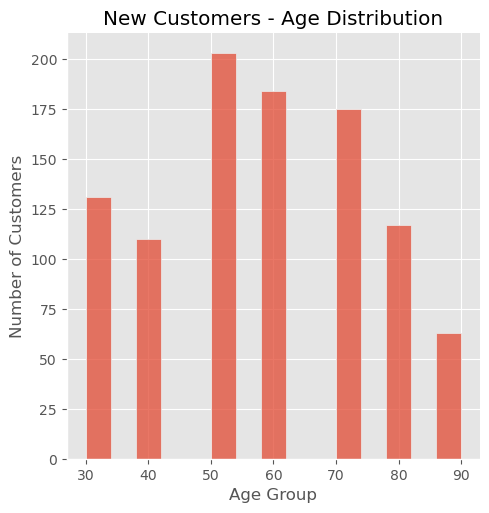

In [35]:
plt.figure(figsize=(10,8))
sns.displot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

/Users/abhaykatti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

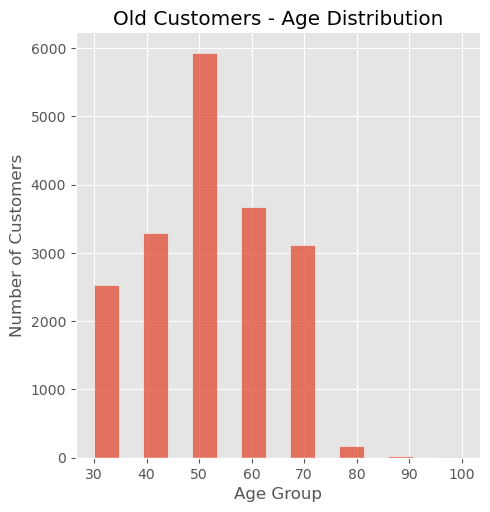

In [37]:
plt.figure(figsize=(10,8))
sns.displot(cust_trans_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

# 3.2: Bike related purchases over last 3 years by gender

In [38]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

In [39]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [40]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [41]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,466277,50.857409
1,Male,450555,49.142591


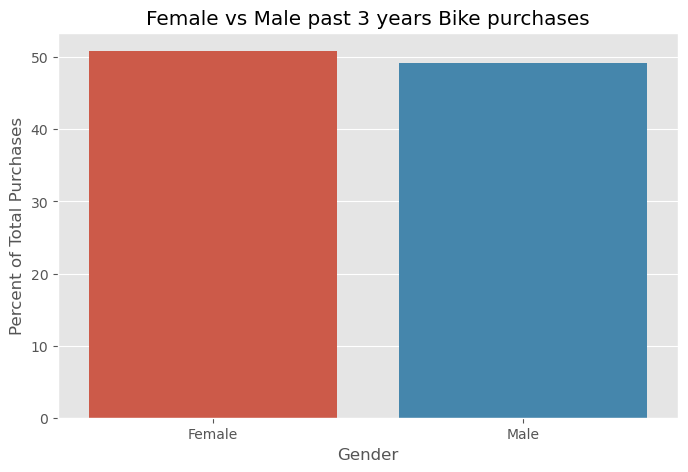

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

# 3.3: Job Industry Customer Distribution

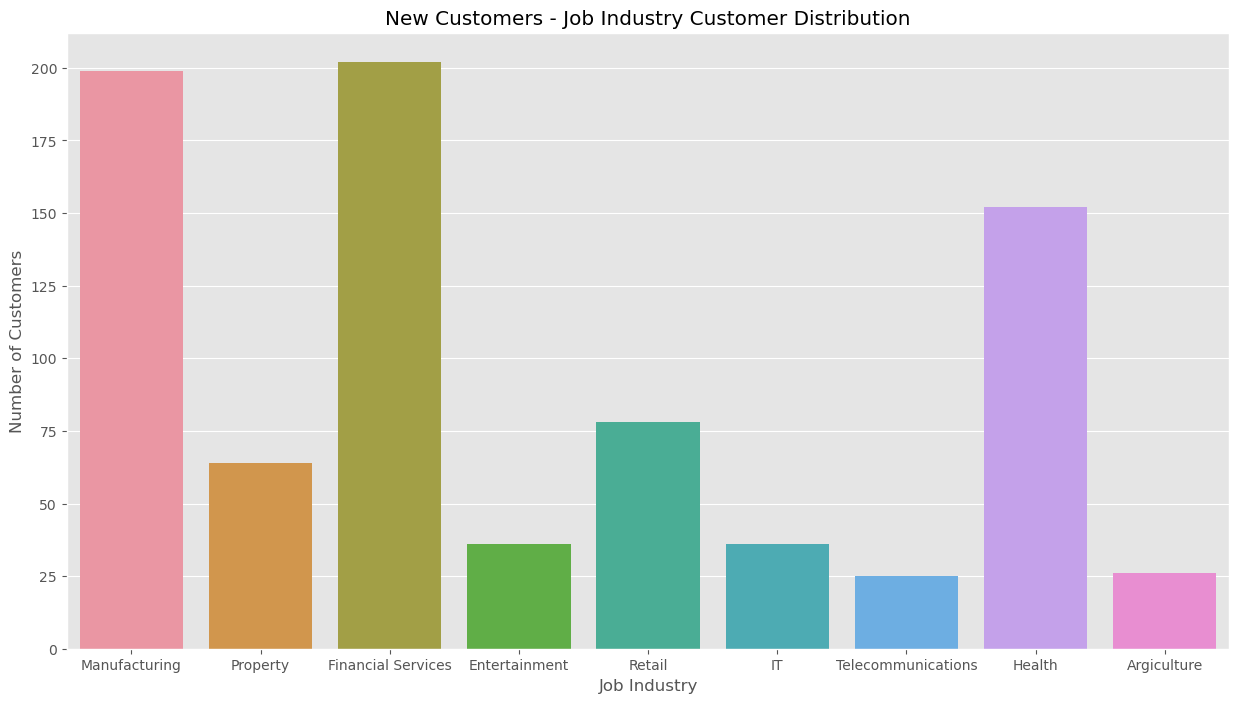

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()


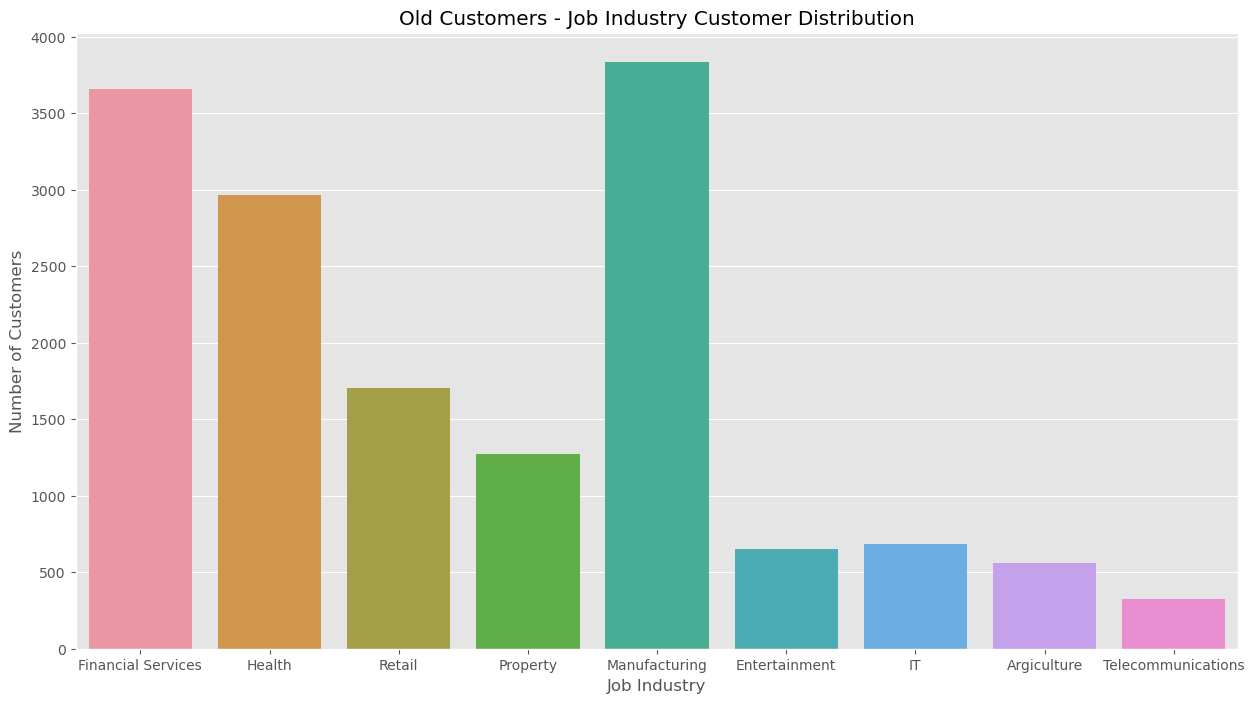

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

# 3.4: Wealth Segmentation by Age Group

New customers

In [45]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [46]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,28
8,High Net Worth,40,36
9,High Net Worth,50,51


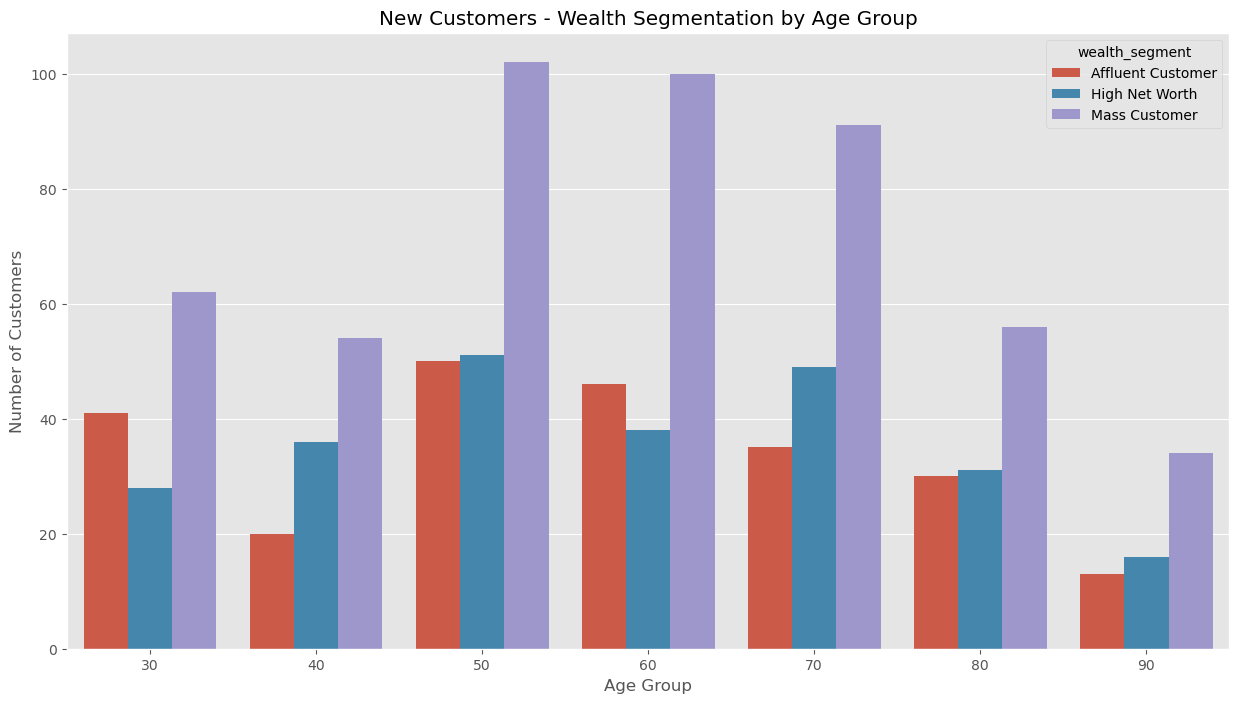

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.

In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group.

Old customers

In [48]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [49]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

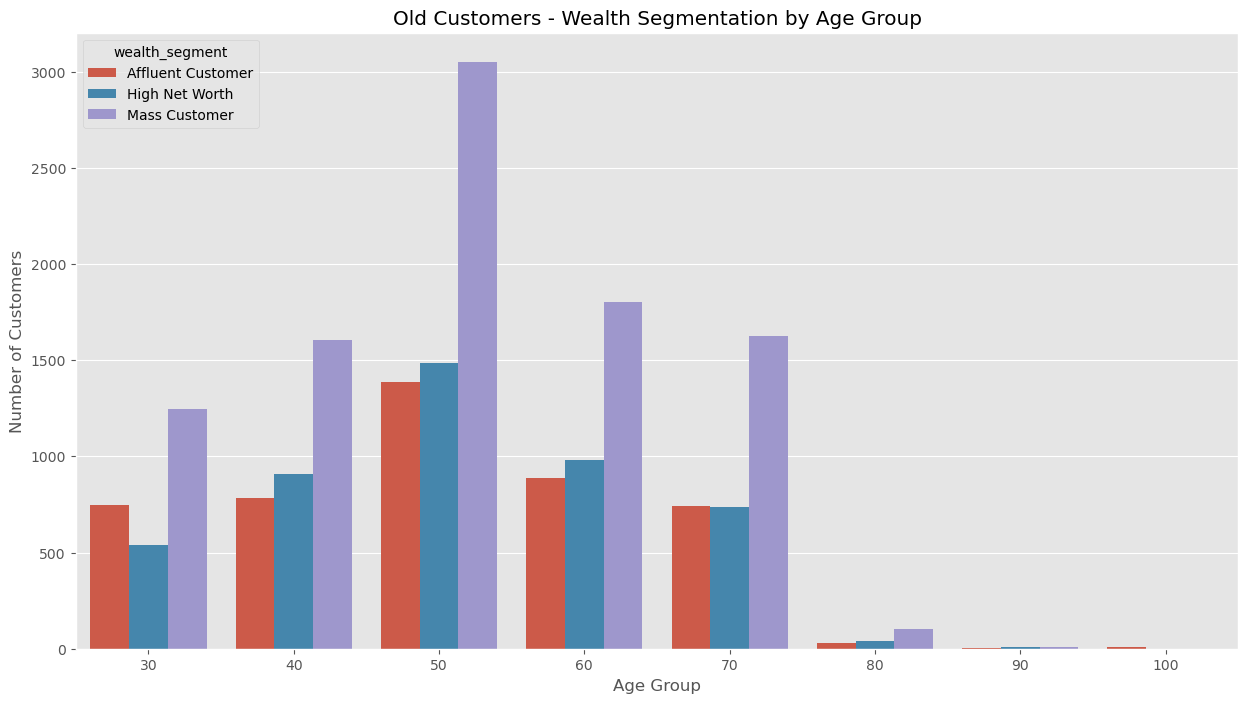

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

# 3.5: Car owner across each State


In [51]:
# Loading the Customer Address Dataset.

cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [52]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [53]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 18732
Address Table Records count :3999


In [54]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [55]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,855
1,NSW,Yes,910
2,QLD,No,348
3,QLD,Yes,354
4,VIC,No,427
5,VIC,Yes,409


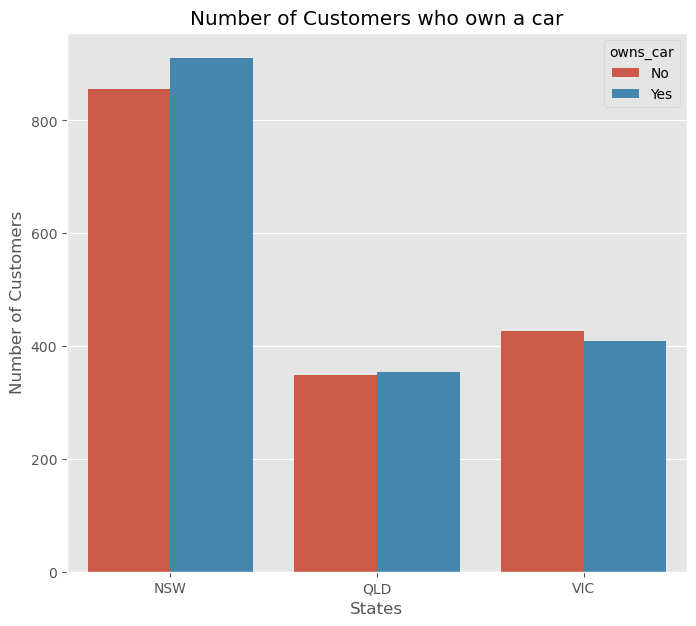

In [56]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW. 

# 4: RFM Analysis Scatter Plots

# 4.1: Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue."

<Figure size 800x700 with 0 Axes>

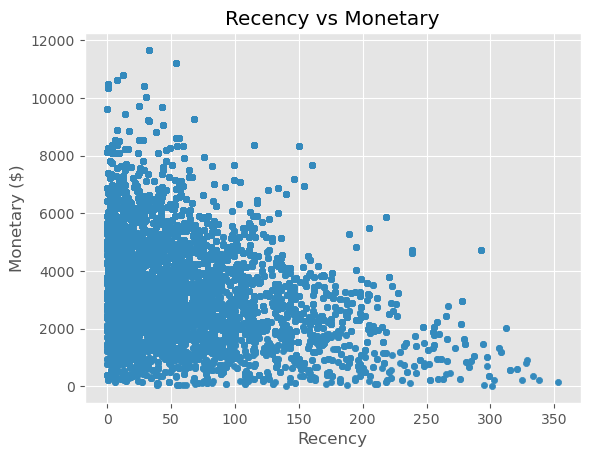

In [57]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

# 4.2: Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

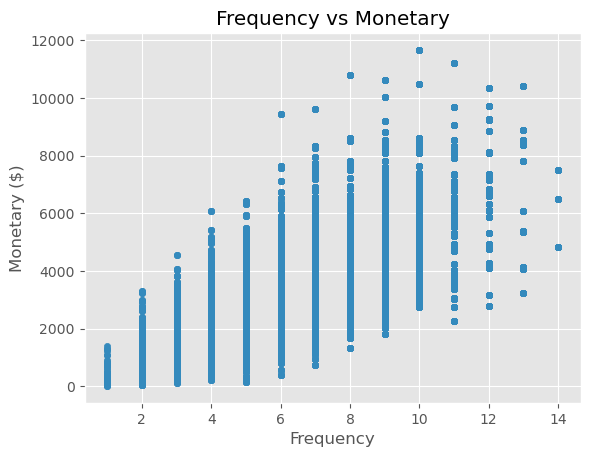

In [58]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# 5: Customer Segment Distribution

In [59]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [60]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,156
10,Very Loyal,2,174
1,Becoming Loyal,3,318
9,Recent Customer,4,343
8,Potential Customer,5,340
4,Late Bloomer,6,340
3,High Risk Customer,8,359
0,Almost Lost,11,306
2,Evasive,11,374
5,Losing Customer,11,316


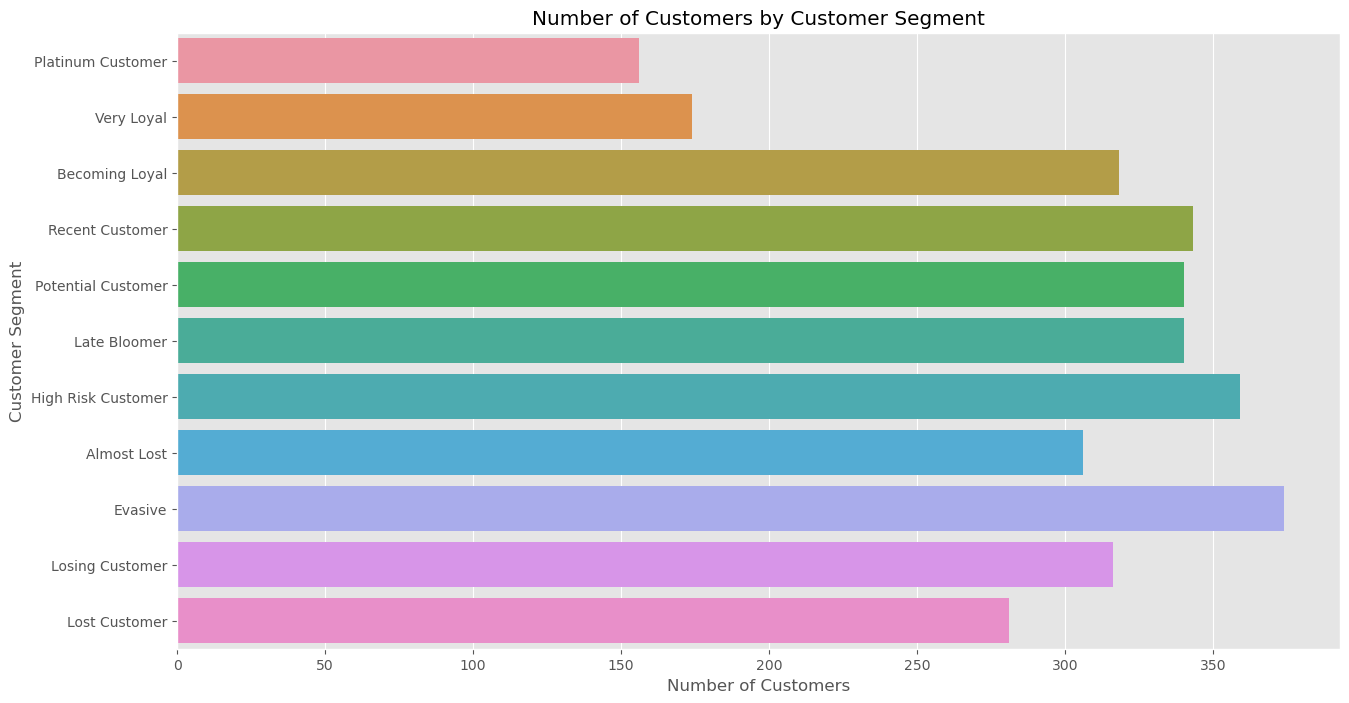

In [61]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()